In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iris = pd.read_csv('./iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


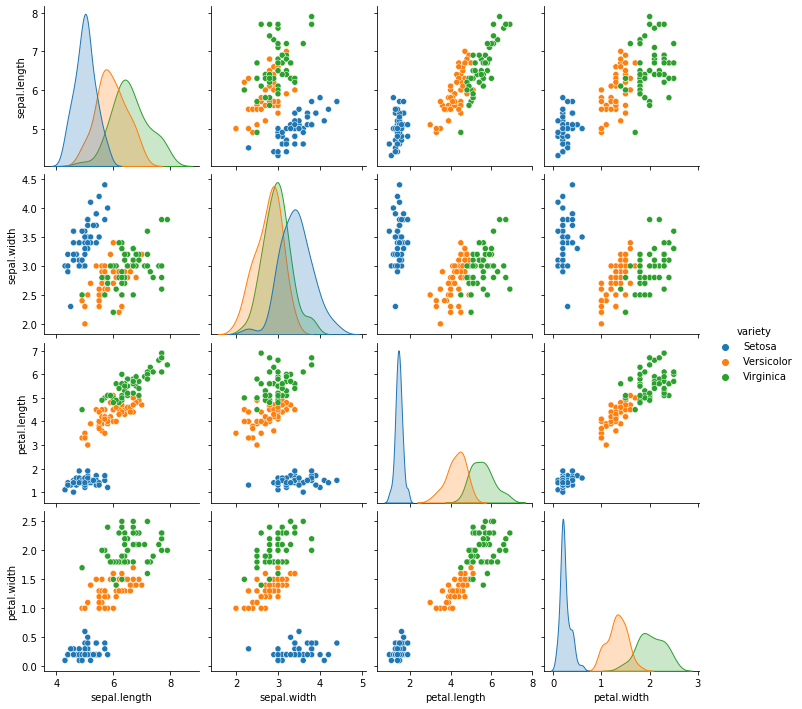

In [10]:
sns.pairplot(iris, hue="variety")

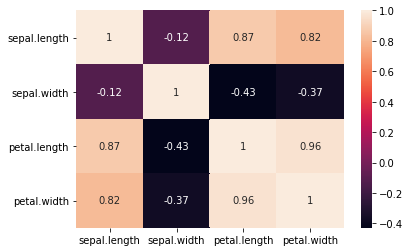

In [14]:

ax = sns.heatmap(iris.corr(), annot=True)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris[['sepal.length','sepal.width','petal.length','petal.width']],iris['variety'],test_size=.5)

In [25]:

# evaluate a lda model on the dataset
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, iris[['sepal.length','sepal.width','petal.length','petal.width']], y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.980 (0.031)


In [83]:

model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, iris[['petal.width']], iris['variety'], scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean Accuracy: 0.960 (0.041)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

iris_pca = pd.DataFrame(data=X_pca)
iris_pca['variety'] = iris['variety']

In [65]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [76]:
np.transpose(pca.components_@np.transpose(X))- X_pca

array([[ 8.88178420e-15,  3.33066907e-16,  3.52495810e-15,
         4.18762247e-15],
       [ 2.66453526e-15,  4.44089210e-16,  5.55111512e-16,
        -8.32667268e-17],
       [ 1.33226763e-15, -1.11022302e-16, -1.08246745e-15,
         9.67975700e-16],
       [ 1.77635684e-15, -1.11022302e-16, -1.66533454e-16,
         4.16333634e-16],
       [ 1.33226763e-15,  0.00000000e+00, -3.71230824e-16,
         4.85722573e-17],
       [ 4.44089210e-16,  0.00000000e+00, -3.36536354e-16,
        -2.84494650e-16],
       [ 1.33226763e-15, -9.02056208e-17, -1.11022302e-16,
         1.38777878e-16],
       [ 1.77635684e-15,  2.49800181e-16, -3.19189120e-16,
         1.94289029e-16],
       [ 2.22044605e-15,  0.00000000e+00,  5.55111512e-17,
         4.85722573e-16],
       [ 1.77635684e-15,  1.66533454e-16, -4.44089210e-16,
         3.74700271e-16],
       [ 8.88178420e-16,  2.22044605e-16, -4.44089210e-16,
        -2.42861287e-17],
       [ 1.77635684e-15,  0.00000000e+00, -3.19189120e-16,
      

In [78]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [58]:
iris_pca[0]

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Name: 0, Length: 150, dtype: float64

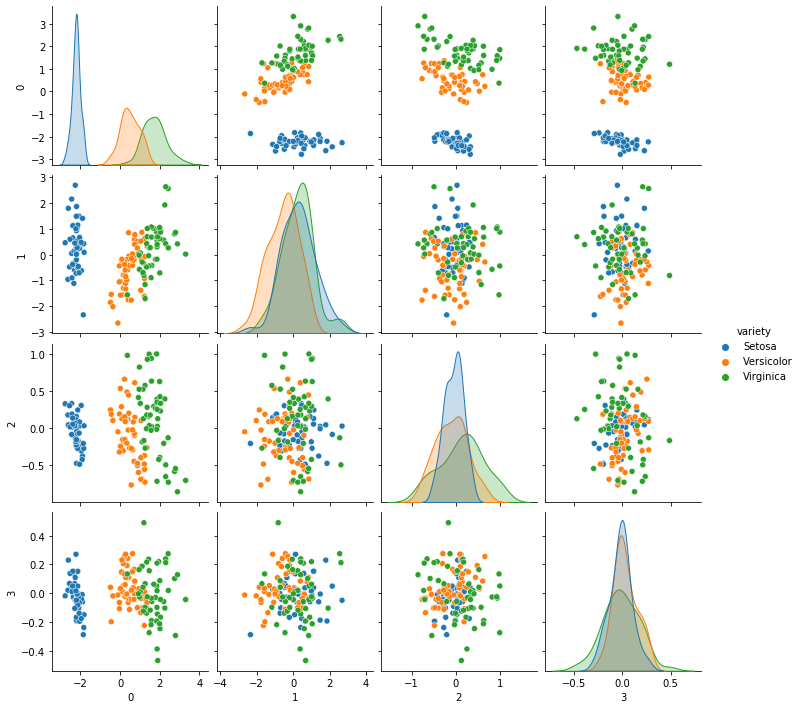

In [59]:
sns.pairplot(iris_pca, hue='variety')

In [79]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, iris_pca[[0]], iris['variety'], scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.929 (0.062)
